**DATA PREPROCESSING**

Data: Kaggle = https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

Description: This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

Target Variable: Stroke (Binary)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Preprocessing
#
# Problem Statement: To predict the likeliness of a patient to encounter stroke
# with 0 being 'not likely' and 1 being 'likely'
#
# Purpose: Remove any anomalies spotted in EDA so that the data is more accurate
# to solve the problem statement
#
# Flow: EDA -> Data Preprocessing
#
# Steps Taken:
# 1) Understand and explore scope of data (use: shape for dimensions, info to check data_types,
# describe to view proportion of numerical data, unique/nunique to check unique data of classification attributes)
#
# 2) Adjust Incorrect Attribute Data Types (Optional: If needed, checked in info, unique)
# Reason to wrong data type: could be typo error, mispell, capitalization, wrong format,
# misinterpretation of attribute during data fill-ups etc.
# Steps: detect the rows involved -> replace value with attribute's mean -> re-check data_type (either replace or astype)
# 
# 3) Handle Duplication Data (Deletion, mostly CATEGORICAL/string)
# Reason to duplication: could be database or function problem, runtime issue, human mistakes (customer inputs twice)
# Steps: identify attribute data that CANNOT be duplicated (e.g: id) -> detect duplicated attribute data (column) ->
# detect duplicated records (rows) -> delete duplication (use drop w/ axis) 
#
# 4) Perform 1st EDA (visually & statistically detect & remove outliers)
# Reason to EDA: To explore patterns, find out anomalies such as outliers, and test hypothesis and early assumptions which
# further helps in understanding the data to make better future analysis
# Steps: do Descriptive Statistical Information (done w/ describe; compare std w/ mean) -> highlight attributes w/ outlier (min & max) ->
# plot boxplot, histogram, scatterplot (to verify) -> detect rows/col involved -> decision to remove or replace (use drop or replace) ->
# re-check EDA
#
# (VERY IMPORTANT: We put removing outliers before handling missing data because if we decide
# to impute missing data with mean, the imputed data is affected by the outlier's value)
# 5) Handle Missing Data (Deletion or Imputation)
# Reason to missing data: could be sensitive data, typo error etc.
# Steps: detect rows/col involved -> decision to delete or impute based on %/No. of Missing ->
# delete/impute data (use isnull/fillna/simpleimputer)
#
# 6) Perform Label Encoding (for Categorical data)
# Reason: to convert string data into numerical data so that is readable by binary machine
# Steps: detect col involved -> do label encoding (use simpleEncoder, factorize, onehotencoder)
# 
# 7) Perform Variable Assignment (x and y dataset)
# Reason: to select suitable input dataset which influences target variable dataset
# Steps: check significance of x to y (use OSL) -> remove low significance -> check correlation between attributes (use corrs, heatmap) ->
# take 1 high correlated attribute -> assign inputs to x, assign TV to y (use select, iloc) -> recheck significance (OSL)
#
# 8) Perform Class Balancing (for Categorical data)
# Steps: detect TV -> do class balancing (over-sampling or under-sampling)
#
# 9) Perform Normalization (for NN)
# Reason: to obtain mean close to 0 via scale down, so that learning rate is optimal and faster convergence
# Steps: normalize x -> check normalized_x (use normalize)
#
# 10) Perform Data Splitting (train set, test set, x, y)
# Reason: to split train and test dataset; train set use to build model with default hyperparameter algorithm;
# test set use to get predicted values to be evaluated against actual y value
# Steps: split x and y into trainx, testx, trainy, testy (define split ratio and random state)
#
# 11) Build and Train Model Solution (w/ DL algorithm selected)
# Reason: to get equation of solution to solve the problem statement
# Steps: select algorithm -> set hyperparameters -> fit and transform -> predict using testx 
#
# 12) Evaluate Result (Numerical or Categorical)
# Reason: to evaluate the 'accuracy' or how optimal or trustworthy is the model solution to solve the problem
# Steps: select score -> evaluate ypred against yactual
#
# 13) Perform Optimization and HyperParameterTuning (search for better model)
# Reason: to improve the accuracy of the model to solve the problem statement
# Steps: select suitable method -> search for optimal hyperparameters -> build the optimal model ->
# evaluate optimal result vs previous result -> Present findings via plottings
# 
# Load Dataset using pandas
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# View first 5 rows
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# STEP 1 (Understand and explore scope of data)
#
# View data dimensions (row, column)

count_label = np.asarray(['No. of Records', 'No. of Columns:'])

dict = {}
for index, i in enumerate(count_label):
    dict[i] = data.shape[index]

pd.DataFrame(dict,index=["count"]).transpose()

,count
No. of Records,5110
No. of Columns:,12


In [ ]:
# Understand the variables or column exist within the dataset
#
# List down all the name of the columns within the dataset
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# STEP 2 (Adjust Incorrect Attribute Data Types)
#
# Check data types
# Verdict: All attributes are in correct data type, 7 int types, 5 string
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# View Summary of Data
# Verdicts:
# 1) Correct 7 int attributes displayed
# 2) Outliers suspected (std > mean) = hypertension, heart_disease, stroke (ignore)
# 3) Outliers to consider (min, max values) = age (min = 0.08), avg_glucose_level (min = 55.12, max = 271.74), but still consider BMI (max = 97)
# 4) BMI has missing records = (5110 total - 4909: 201 missing data)
#
# Citation Acceptable Glucose Level (70-200): https://www.singlecare.com/blog/normal-blood-glucose-levels/#:~:text=A%20normal%20blood%20glucose%20level,90%20to%20110%20mg%2FdL.
# Citation Acceptable BMI Value (9-105 <- Highest BMI ever recorded): https://bmicalculator.mes.fm/bmi-chart
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# View number of unique data in each attribute
# Verdicts:
# 1) From this, take low unique count and display unique data to validate value
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


In [ ]:
# View unique data in each attribute
# Verdicts:
# 1) Find out more about 'Other' in gender column
# 2) Find out more about 'children' in work_type column
# 3) Find out more about 'Unknown' in smoking_status column
# 4) Standardize all data to lowercase
data_select = data[['gender', 'hypertension', 'heart_disease', 'ever_married',
                   'work_type', 'Residence_type', 'smoking_status', 'stroke']]
dict = {}
for i in list(data_select.columns):
    dict[i] = ', '.join(str(x) for x in data_select[i].unique())

pd.DataFrame(dict,index=["unique value"]).transpose()

,unique value
gender,"Male, Female, Other"
hypertension,"0, 1"
heart_disease,"1, 0"
ever_married,"Yes, No"
work_type,"Private, Self-employed, Govt_job, children, Ne..."
Residence_type,"Urban, Rural"
smoking_status,"formerly smoked, never smoked, smokes, Unknown"
stroke,"1, 0"


In [ ]:
# View record having 'Other' as 'gender'
# Verdicts:
# 1) Since the count is 1, Discard this record later
display(data[data['gender'] == 'Other'])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
# View record having 'children' as 'work_type'
# Verdicts:
# 1) There is 687 records having children, so it is not a mistype, Do Nothing about it
display(data[data['work_type'] == 'children'])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
290,55680,Male,13.00,0,0,No,children,Urban,114.84,18.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


In [ ]:
# Calculate percentage of record having 'Unknown' as 'smoking_status'
percentage_unknown = round(data[data['smoking_status'] == 'Unknown'].shape[0]/data.shape[0]*100, 2)
print('Percentage of data Unknown as smoking_status',
      percentage_unknown, '%')

Percentage of data Unknown as smoking_status 30.22 %


In [ ]:
# View record having 'Unknown' as 'smoking_status'
# Verdicts:
# 1) There is 1544 records having Unknown, which is 30.22% pretty high, 2 options:
# take it as it is or replace with mode ; CANNOT DISCARD because too many records,
# if discard, data is not accurate anymore
# Answer: Take it as it is (Do nothing)
display(data[data['smoking_status'] == 'Unknown'])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [ ]:
# Handle Capitalization and 1 record of 'Other' as 'gender'
# Drop data
data.drop(data.index[data['gender'] == 'Other'], inplace = True)

# Reset index of dataframe
data = data.reset_index(drop = True)
print('Unique data in gender', data['gender'].unique())
print('Total Records: ', data.shape[0])

Unique data in gender ['Male' 'Female']
Total Records:  5109


In [ ]:
# Change all to lowercase
data['gender'] = data['gender'].str.lower()
data['ever_married'] = data['ever_married'].str.lower()
data['work_type'] = data['work_type'].str.lower()
data['Residence_type'] = data['Residence_type'].str.lower()
data['smoking_status'] = data['smoking_status'].str.lower()

data_select = data[['gender', 'hypertension', 'heart_disease', 'ever_married',
                   'work_type', 'Residence_type', 'smoking_status', 'stroke']]
dict = {}
for i in list(data_select.columns):
    dict[i] = ', '.join(str(x) for x in data_select[i].unique())

pd.DataFrame(dict,index=["unique value"]).transpose()

,unique value
gender,"male, female"
hypertension,"0, 1"
heart_disease,"1, 0"
ever_married,"yes, no"
work_type,"private, self-employed, govt_job, children, ne..."
Residence_type,"urban, rural"
smoking_status,"formerly smoked, never smoked, smokes, unknown"
stroke,"1, 0"


In [ ]:
# STEP 3 (Handle Duplication Data)
#
# Verdicts:
# 1) No duplicated records detected, can skip this step
# Detect duplicated records by id
print("Number of duplicated ID: ", data[data.columns[0]].duplicated().sum())

# Detect duplicated records by all attributes
print("Number of duplicated Records: ", data.duplicated().sum())

Number of duplicated ID:  0
Number of duplicated Records:  0


<function matplotlib.pyplot.show>

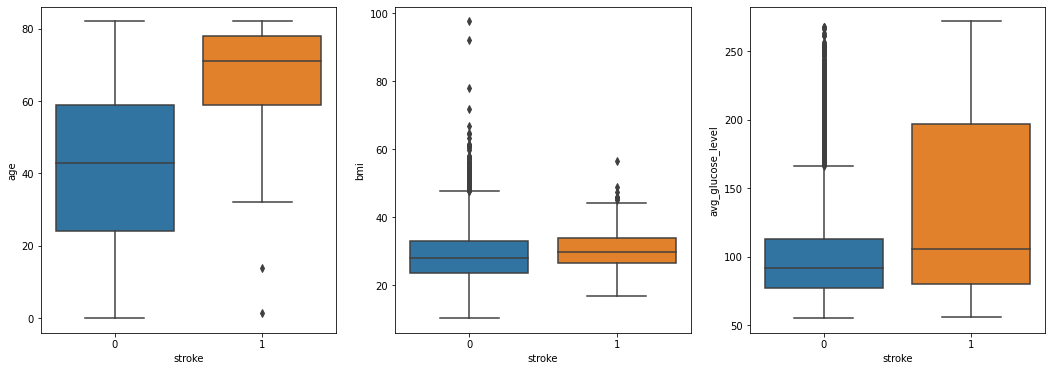

In [ ]:
# STEP 4 (Perform 1st EDA)
# Descriptive Statistical Information is DONE ALREADY EARLIER
# ...bringing the verdict:
# 1) Outliers suspected (std > mean) = hypertension, heart_disease, stroke (ignore)
# 2) Outliers to consider (min, max values) = age (min = 0.08), avg_glucose_level
# (min = 55.12, max = 271.74), but still consider BMI (max = 97)
#
# Plot boxplot (Handling verdict 2: age, avg_glucose_level, bmi)
# ----------------------------------------------------------------
# Boxplot shows how well your data is dispersed and distributed which tells you if your
# data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.
# Even they show outliers visibly that is position OUTSIDE OF MAX or MIN boundary.
# ----------------------------------------------------------------
# Verdicts:
# 1) Age against Stroke boxplot shows outliers
# 2) BMI against Stroke boxplot shows outliers (dot is spread so far away when Stroke = 0)
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6) , squeeze=True) # Segment subplots arranged as 1 row and 3 columns

sns.boxplot(data=data, y=data['age'], x=data['stroke'], ax=axes[0]) # axes refers to column positioning when row is 1
sns.boxplot(data=data, y=data['bmi'], x=data['stroke'], ax=axes[1])
sns.boxplot(data=data, y=data['avg_glucose_level'], x=data['stroke'], ax=axes[2])

plt.show

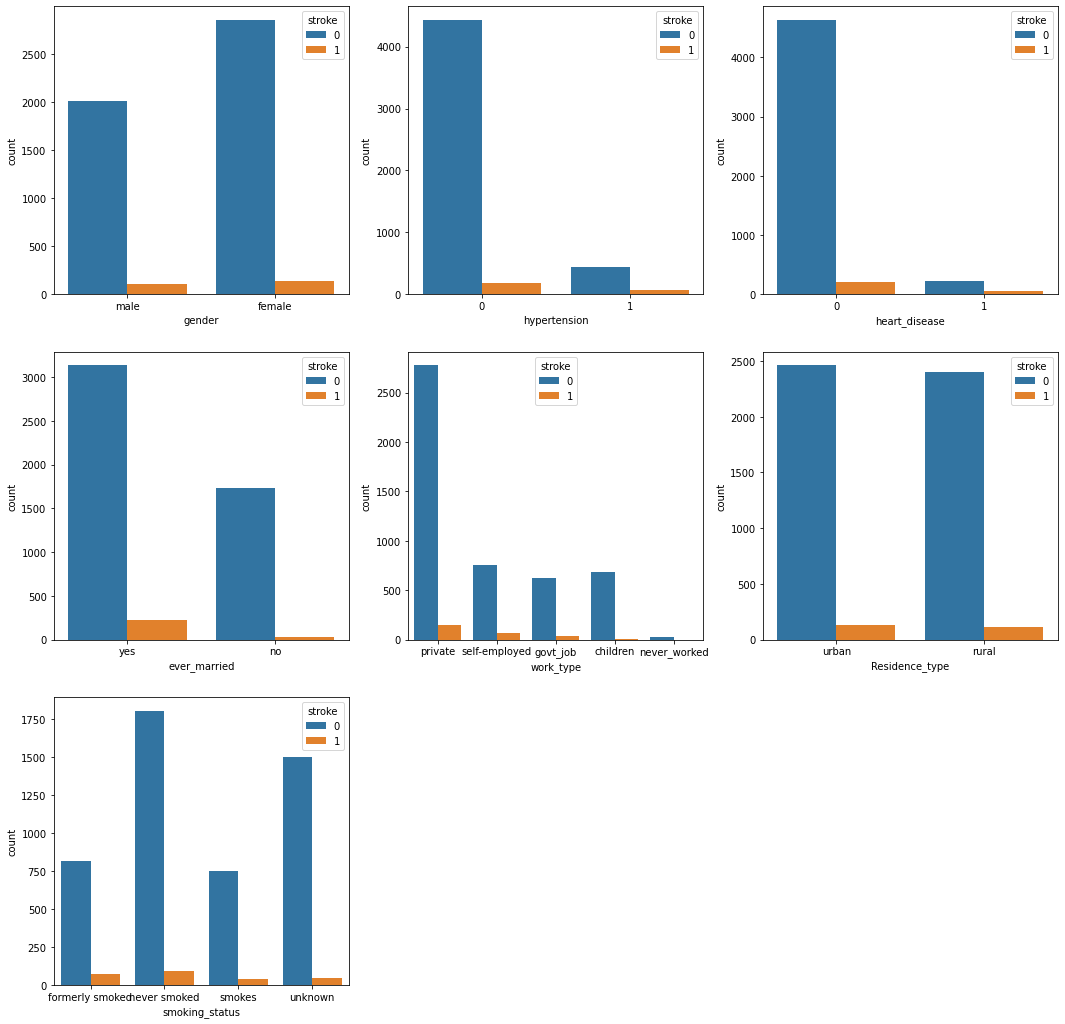

In [ ]:
# Plot histogram (Handling verdict 1: hypertension, heart_disease, and others)
# -----------------------------------------------------
# Histogram shows the frequency comparison between 2 or more types of attributes or
# data value which helps us to decide actions to take on the distribution shown,
# It shows the Relationship too between x and y
# -----------------------------------------------------
# Verdicts:
# 1) There are more people w/o stroke than w/ stroke which means the data is not
# balanced
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 18))

fig.delaxes(ax=axes[2,1]) # to delete extra subplots located at row 2, col 1 & 2
fig.delaxes(ax=axes[2,2])

sns.countplot(x="gender", hue='stroke', data=data , ax=axes[0,0])
sns.countplot(x="hypertension", hue='stroke', data=data , ax=axes[0,1])
sns.countplot(x="heart_disease", hue='stroke', data=data , ax=axes[0,2])

sns.countplot(x="ever_married", hue='stroke', data=data , ax=axes[1,0])
sns.countplot(x="work_type", hue='stroke', data=data , ax=axes[1,1])
sns.countplot(x="Residence_type", hue='stroke', data=data , ax=axes[1,2])

sns.countplot(x="smoking_status", hue='stroke', data=data , ax=axes[2,0])

plt.show()

<function matplotlib.pyplot.show>

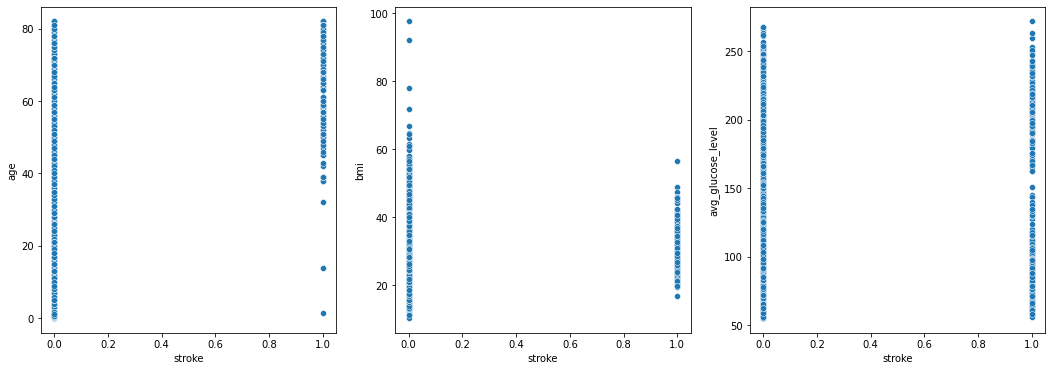

In [ ]:
# Plot scatterplot (Handling verdict 2: age, avg_glucose_level, bmi)
# ----------------------------------------------------
# Scatterplot reveals outliers which are spread far away from the mean
# ----------------------------------------------------
# Verdicts:
# 1) To confirm verdicts in boxplot, BMI and age have outliers.
# However, these are against stroke. We must confirm individually w/o stroke.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6) , squeeze=True)

sns.scatterplot(data=data, x=data['stroke'], y=data['age'], ax=axes[0])
sns.scatterplot(data=data, x=data['stroke'], y=data['bmi'], ax=axes[1] )
sns.scatterplot(data=data, x=data['stroke'], y=data['avg_glucose_level'], ax=axes[2])

plt.show

<function matplotlib.pyplot.show>

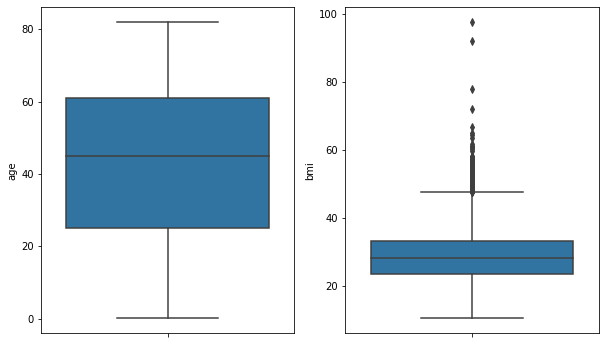

In [ ]:
# To Re-Confirm outliers in age and BMI
# Plot Individual Boxplot
# Verdicts:
# 1) Age shows NO outliers, while BMI still shows outliers of value > 70.
# Therefore, conduct outliers removal on BMI respectively
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6) , squeeze=True)

sns.boxplot(data=data, y=data['age'], ax=axes[0])
sns.boxplot(data=data, y=data['bmi'], ax=axes[1])

plt.show

In [ ]:
# Display rows with 'bmi' > 70
# Verdicts:
# 1) It shows 4 records of outliers which is VERY SMALL to 5109 total records,
# therefore not an issue to discard these outliers
display(data[data['bmi'] > 70])

# Discard outliers
data.drop(data.index[data['bmi'] > 70], inplace = True)

# Reset index of data
data = data.reset_index(drop = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,male,42.0,0,0,yes,private,rural,210.48,71.9,never smoked,0
928,41097,female,23.0,1,0,no,private,urban,70.03,78.0,smokes,0
2128,56420,male,17.0,1,0,no,private,rural,61.67,97.6,unknown,0
4208,51856,male,38.0,1,0,yes,private,rural,56.90,92.0,never smoked,0


<function matplotlib.pyplot.show>

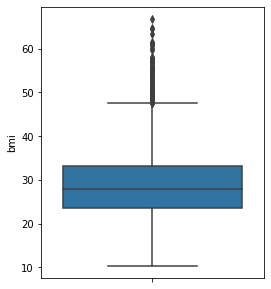

In [ ]:
# Checking outliers after handling outliers
# OUTLIERS ARE GONE!!!
plt.figure(figsize = (4,5)) # set figure size

sns.boxplot(data=data, y=data['bmi'])

plt.show

In [ ]:
# STEP 5 (Handle missing data)
#
# Check missing value
# Verdicts:
# 1) Yes, we were right, there are 201 missing data in 'bmi'
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Check percentage of missing data
# Verdicts:
# 1) Since 3.94% is very little, imputing it with mean shouldn't be
# much of hassle and it wont affect much to the overall data
print('Percentage of missing data: ', round(data['bmi'].isnull().sum()/data.shape[0]*100, 2), '%')

Percentage of missing data:  3.94 %


In [ ]:
# Impute missing data with mean
# MISSING DATA IS GONE!!!
data["bmi"] = data["bmi"].fillna(data["bmi"].mean())
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
# STEP 6 (Perform Label Encoding)
# 
# Factorize Categorical Data to Numerical
data_select = data.select_dtypes(include='object')
for i in list(data_select.columns):
    data[i] = pd.factorize(data[i])[0]

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,51676,1,61.0,0,0,0,1,1,202.21,28.848899,1,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.000000,1,1


In [ ]:
# Check encoding by viewing unique values
# LABEL ENCODING SUCCEEDED!!!
dict = {}
for i in list(data_select.columns):
    dict[i] = ', '.join(str(x) for x in data[i].unique())

pd.DataFrame(dict,index=["unique value"]).transpose()

,unique value
gender,"0, 1"
ever_married,"0, 1"
work_type,"0, 1, 2, 3, 4"
Residence_type,"0, 1"
smoking_status,"0, 1, 2, 3"


In [ ]:
# STEP 7 (Perform Variable Assignment)
#
# Dropping column that is not revelant which in this case, id column is not required as it is just the number of the record.
data = data.drop(['id'], axis = 1)

data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1,61.0,0,0,0,1,1,202.21,28.848899,1,1
2,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,1,80.0,1,0,0,0,0,83.75,28.848899,1,0
5101,1,81.0,0,0,0,1,0,125.20,40.000000,1,0
5102,1,35.0,0,0,0,1,1,82.99,30.600000,1,0
5103,0,51.0,0,0,0,0,1,166.29,25.600000,0,0


In [ ]:
# As the Target Variable (TV) is stroke, the value for this column will be saved in Y, while the others will be saved in X as Input Variable (IV)
# Checking the correlation of the v

x = data.iloc[:, 0:9] # Input Variable
y = data.iloc[:, 10] # Target Variable

print (x)
print (y)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              1             0          0   
1          1  61.0             0              0             0          1   
2          0  80.0             0              1             0          0   
3          1  49.0             0              0             0          0   
4          1  79.0             1              0             0          1   
...      ...   ...           ...            ...           ...        ...   
5100       1  80.0             1              0             0          0   
5101       1  81.0             0              0             0          1   
5102       1  35.0             0              0             0          1   
5103       0  51.0             0              0             0          0   
5104       1  44.0             0              0             0          2   

      Residence_type  avg_glucose_level        bmi  
0                  0             2

In [ ]:
# Checking the correlation of between all the variables within the dataset, but more importantly is to understand the correlation between the target variable and the input variable.
#
# High correlation instance variable can be choosen as the main variable to be used for prediction
# If there are any variable that has high correlation between each other (> 0.8), it should be drop to pervent wrong prediction.
data.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.027581,-0.020448,-0.085856,-0.030443,-0.066295,-0.005237,-0.054606,0.030573,-0.038956,-0.009206
age,0.027581,1.000000,0.278548,0.263730,-0.679039,-0.413951,-0.013924,0.238175,0.336712,-0.375999,0.245193
hypertension,-0.020448,0.278548,1.000000,0.109005,-0.165981,-0.074077,0.007443,0.177020,0.150046,-0.130232,0.128636
heart_disease,-0.085856,0.263730,0.109005,1.000000,-0.114597,-0.058456,-0.002949,0.162013,0.041003,-0.064741,0.134868
ever_married,-0.030443,-0.679039,-0.165981,-0.114597,1.000000,0.376693,0.006272,-0.154872,-0.345354,0.303818,-0.108295
work_type,-0.066295,-0.413951,-0.074077,-0.058456,0.376693,1.000000,-0.014132,-0.068175,-0.345404,0.307869,-0.058408
Residence_type,-0.005237,-0.013924,0.007443,-0.002949,0.006272,-0.014132,1.000000,0.004588,-0.003063,-0.004343,-0.015329
avg_glucose_level,-0.054606,0.238175,0.177020,0.162013,-0.154872,-0.068175,0.004588,1.000000,0.174663,-0.097189,0.132074
bmi,0.030573,0.336712,0.150046,0.041003,-0.345354,-0.345404,-0.003063,0.174663,1.000000,-0.237350,0.040931
smoking_status,-0.038956,-0.375999,-0.130232,-0.064741,0.303818,0.307869,-0.004343,-0.097189,-0.237350,1.000000,-0.066461


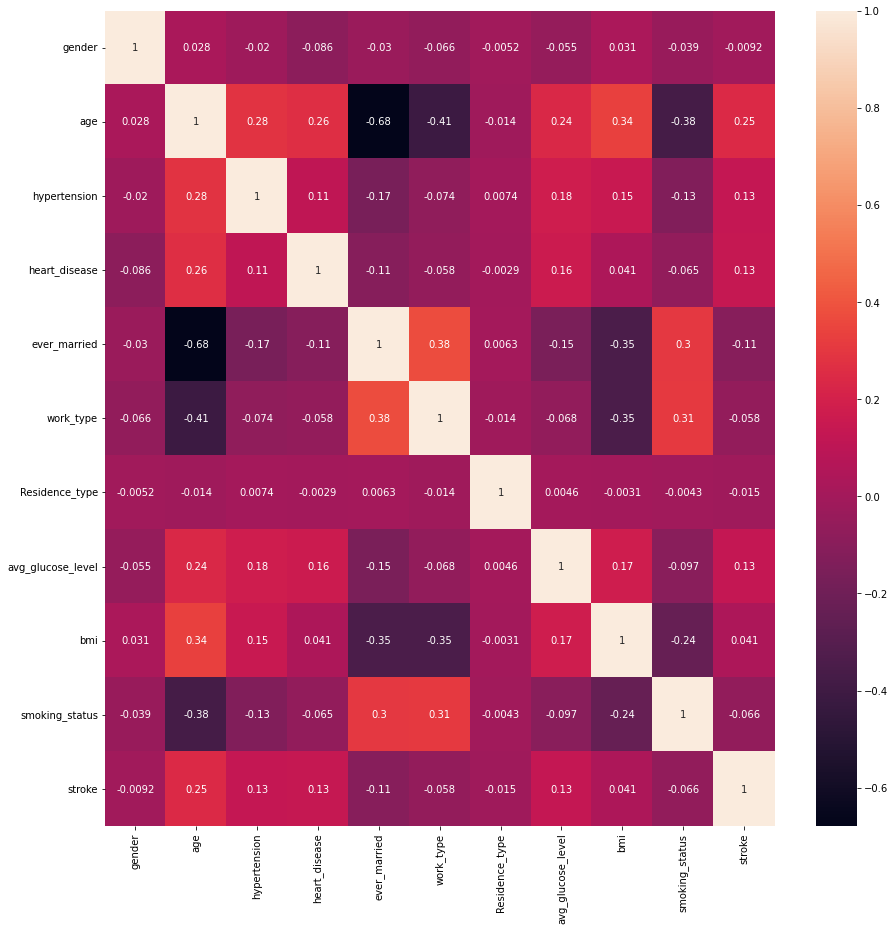

In [ ]:
# Heatmap is created to understand the correlation between the variable more easily.
#
# Since there are no variables that contain correlation over 0.8, no column will be dropped. 
# Based on the heatmap, the three variable that is most correlated to the target variable (stroke) are
# age, (hypertension, heart_disease, avg_glucose_level) = same value
plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True)

In [ ]:
# Performing OLS Regression Result to check whether the IV and TV is related and suitable to be used as the input variable
#
# Adding constant into the existing x (input variable) for OLS Regression 
# Import statsmodel.api for OLS Regression
import statsmodels.api as sm
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
print (est.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     49.32
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.01e-86
Time:                        06:45:18   Log-Likelihood:                 807.08
No. Observations:                5105   AIC:                            -1594.
Df Residuals:                    5095   BIC:                            -1529.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0903      0.01

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Based on the OLS Regression result, we can determine that there are some input variable is not significant towards the target values 
# since the P value for the input variable is greater than the significant value (0.05)
# Input variable that is higher than the significant value include gender, work_type and Residence_type
# Therefore, these three column will be dropped from x

x.drop(columns = ['gender', 'work_type', 'Residence_type'], axis = 1, inplace = True)

In [ ]:
# the Input value will be tested in the OLS Regression Test again to check whether the IV and TV is suitable
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
print (est.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     73.43
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.62e-88
Time:                        06:45:21   Log-Likelihood:                 805.41
No. Observations:                5105   AIC:                            -1597.
Df Residuals:                    5098   BIC:                            -1551.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0836      0.01

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


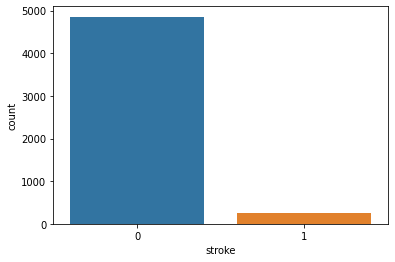

In [ ]:
# STEP 8 (Perform Class Balancing)
#
# Class Balancing is done on the Target Variable if the target variable is not balanced.
# Countplot is used to show the number of class amount in the stroke column.
sns.countplot(x = y)

1    4856
0    4856
Name: stroke, dtype: int64


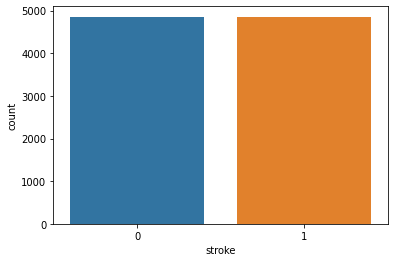

In [ ]:
# Based on graph, the number of patient that had stroke is significantly lower then the number of patient that does not have stroke.
# This means that the class for Target Variable to be extremely unbalanced
# Two methods to treat imbalanced class, Under or Over Sampling. 
# Oversampling is done to prevent data lost as the differences of the 0 and 1 is too much
# under sampling means that huge amount of data will be deleted
#
# Oversampling is done using SMOTE

from imblearn.over_sampling import SMOTE
x_b, y_b = SMOTE().fit_resample(x, y)
print(y_b.value_counts())
sns.countplot(x = y_b)

In [ ]:
# STEP 9 (Perform Normalization)
#
# Normalization is done with the help of sklearn

from sklearn.preprocessing import normalize

x_n = normalize(x_b)
x_n

array([[0.27789427, 0.        , 0.00414768, 0.        , 0.94853194,
        0.15180493],
       [0.2861544 , 0.        , 0.        , 0.        , 0.94857839,
        0.13533179],
       [0.58538907, 0.        , 0.00731736, 0.        , 0.77505513,
        0.23781431],
       ...,
       [0.34898892, 0.        , 0.        , 0.        , 0.92906474,
        0.12265984],
       [0.34326919, 0.        , 0.00427883, 0.        , 0.93137697,
        0.12118128],
       [0.64559477, 0.        , 0.        , 0.00822115, 0.73594716,
        0.20376845]])

In [ ]:
# STEP 10 (Perform Data Splitting)
#
# Splitting the data into test and training data in the ratio of 2:8
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_n, y_b, test_size = 0.2, random_state = 2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7769, 6) (1943, 6) (7769,) (1943,)


In [ ]:
# The data is split into 80% for training test and 20% for testing test
# Train data -> 7769
# Test data -> 1943

In [ ]:
# STEP 11 (Build and Train Model Solution)
#
# Re-shape x_train and x_test data into 7769 samples of 1 row record with 6 columns
x_n_column = x_n.shape[1]
x_train= np.array(x_train).reshape(len(x_train), 1, x_n_column)
x_test= np.array(x_test).reshape(len(x_test), 1, x_n_column)
print(x_train.shape, x_test.shape)

(7769, 1, 6) (1943, 1, 6)


In [ ]:
# Set Class Weights using y_train Key-to-Value pair in an Array Dictionary
# 
# Parameter settings:
# 1) class_weight set as 'balanced' to be given by n_samples / (n_classes * np.bincount(y))
# 2) classes set as 'np.unique(y_train)' to define an array of unique classes occuring in data
# 3) y set as 'y_train' to defined an array of original class labels per sample
#
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                  classes = np.unique(y_train), y = y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 1.003228305785124, 1: 0.9967924044136516}

In [ ]:
# Select algorithm (as RNN-LSTM), Set default hyperparameters
#
# Model Details:
# 1) Type: Recurrent Neutral-Network (RNN)
# 2) Derivative: Long-Short Term Memory (LSTM)
# 
# Default Model Building Parameters:
# 1) No. of LSTM Layers: 3
# 2) No. of LSTM Units: 50
# 3) Dropout Value: 0.2 (Optimal between 0.0 - 0.5; if > 0.6 is unacceptable)
# - Purpose: To prevent overfitting and underfitting of the model, thus produce smoother result
# 4) No. of Dense Unit: 1
# 5) Dense Activation Function: Sigmoid (Because TV is binary classification)
# 6) Loss Function: Binary Cross Entropy (Because TV is binary classification) 
# 7) Optimizer: Adam (widely accepted default optimizer)
# 8) Metrics: Accuracy (Because TV is binary classification)
#
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape=(1, x_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             11400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
# Fit and Transform
#
# Default Model Building Parameters:
# 9) No. of Epochs: 100 (Set at moderate-high which is widely accepted as default no. of epochs)
# 10) Batch Size: 32 (Set on moderate-low to improve learning process and save time)
# 11) Class Weight Model: set as class_weights dictionary by y_train
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size=32, class_weight=class_weights)

Epoch 1/100
243/243 [==============================] - 13s 12ms/step - loss: 0.6428 - accuracy: 0.6016 - val_loss: 0.5609 - val_accuracy: 0.6639
Epoch 2/100
243/243 [==============================] - 2s 8ms/step - loss: 0.5417 - accuracy: 0.7224 - val_loss: 0.5392 - val_accuracy: 0.7349
Epoch 3/100
243/243 [==============================] - 2s 9ms/step - loss: 0.5327 - accuracy: 0.7388 - val_loss: 0.5214 - val_accuracy: 0.7272
Epoch 4/100
243/243 [==============================] - 2s 8ms/step - loss: 0.5280 - accuracy: 0.7381 - val_loss: 0.5242 - val_accuracy: 0.7272
Epoch 5/100
243/243 [==============================] - 2s 8ms/step - loss: 0.5220 - accuracy: 0.7414 - val_loss: 0.5166 - val_accuracy: 0.7360
Epoch 6/100
243/243 [==============================] - 2s 8ms/step - loss: 0.5205 - accuracy: 0.7384 - val_loss: 0.5187 - val_accuracy: 0.7319
Epoch 7/100
243/243 [==============================] - 2s 8ms/step - loss: 0.5151 - accuracy: 0.7399 - val_loss: 0.5095 - val_accuracy: 0.73

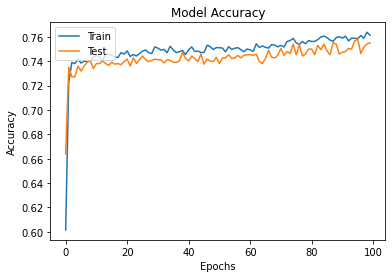

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [ ]:
# Predict x_test
#
predictions= model.predict(x_test)
predictions

array([[6.19192600e-01],
       [4.19112563e-04],
       [1.18994005e-01],
       ...,
       [3.51884902e-01],
       [5.43620646e-01],
       [7.44135320e-01]], dtype=float32)

In [ ]:
# View sum value of predictions and data type
#
sum(predictions)

array([924.8142], dtype=float32)

In [ ]:
# Segment prediction value (more than 0.5 is True, less than 0.5 is False)
# 
# Verdicts:
# 1) Based on a Sigmoid Graph, the output value MUST be BINARY (True or False; 0 or 1),
# thus to solve the float predicted values, any output > 0.5 is taken as True, and otherwise.
#
y_pred = (predictions > 0.5)

y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
# STEP 11: (Evaluate Result)
# Evaluate Model by Accuracy, Precision, Recall and F1 Score
#
# Verdicts:
# 1) 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy of MLP Classifier: ', accuracy_score(y_test, y_pred))
print('Precision of MLP Classifier: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of MLP Classifier: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of MLP Classifier: ', f1_score(y_test, y_pred, average = 'binary'))

Accuracy of MLP Classifier:  0.755018013381369
Precision of MLP Classifier:  0.7306590257879656
Recall of MLP Classifier:  0.7977059436913452
F1 Score of MLP Classifier:  0.7627118644067796


In [ ]:
# View Confusion Matrix
#
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[702, 282],
       [194, 765]])

In [ ]:
# View Classification Report
#
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       984
           1       0.73      0.80      0.76       959

    accuracy                           0.76      1943
   macro avg       0.76      0.76      0.75      1943
weighted avg       0.76      0.76      0.75      1943



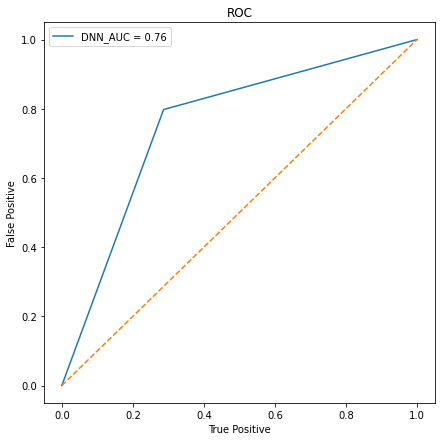

In [ ]:
# Plot ROC-AUC Diagram
import sklearn.metrics as metrics
FP, TP, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(FP, TP)

import matplotlib.pyplot as plt
plt.subplots(1, figsize = (7,7))
plt.title('ROC')
plt.plot(FP, TP, label = 'DNN_AUC = %0.2f' % roc_auc)
plt.plot([0,1], ls = '--')
plt.xlabel('True Positive')
plt.ylabel('False Positive')
plt.legend()

In [ ]:
# STEP 13 (Perform Optimization and HyperParameterTuning)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 31.4 MB/s 


In [ ]:
import keras_tuner as kt
from kerastuner.tuners import RandomSearch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
def model_builder(hp):
  model = Sequential()
  model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),
                 return_sequences=True, input_shape=(1, x_train.shape[2])))
  model.add(Dropout(hp.Float('Dropout_initial',min_value=0.0,max_value=0.5,step=0.1)))

# No of Layers
  for i in range(hp.Int('No of Layers', 1, 3)):

    # No of Neurons
    hp_units = hp.Int('Units_'+str(i), min_value=32, max_value=512, step=32)
    model.add(LSTM(units = hp_units, return_sequences=True))

    # Dropout Value
    hp_dropout = hp.Float('Dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout))

  model.add(LSTM(hp.Int('output_unit',min_value=32,max_value=512,step=32)))
  model.add(Dropout(hp.Float('Dropout_exit',min_value=0.0,max_value=0.5,step=0.1)))

  model.add(Dense(units = 1,
                  activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='sigmoid')))
  
  hp_optimizer = hp.Choice('Optmizer', ['sgd', 'adam', 'rmsprop'])
  model.compile(optimizer=hp_optimizer, loss='binary_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
tuner = RandomSearch(model_builder, objective = 'val_accuracy', max_trials = 5, executions_per_trial = 3,
                        directory = 'Tuning_RNN_LSTM', project_name = 'Stroke Prediction', overwrite = True)

In [ ]:
tuner.search(
    x=x_train,
    y=y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_test,y_test)
)

Trial 5 Complete [00h 29m 57s]
val_accuracy: 0.7538171211878458

Best val_accuracy So Far: 0.7591353456179301
Total elapsed time: 02h 01m 20s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             18176     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 416)            800384    
                                                                 
 dropout_1 (Dropout)         (None, 1, 416)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 416)            1386112   
                                                                 
 dropout_2 (Dropout)         (None, 1, 416)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                1

In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
best_hp.values

{'Dropout_exit': 0.0,
 'Dropout_initial': 0.2,
 'Dropout_rate': 0.1,
 'No of Layers': 2,
 'Optmizer': 'rmsprop',
 'Units_0': 416,
 'Units_1': 416,
 'Units_2': 416,
 'dense_activation': 'sigmoid',
 'input_unit': 64,
 'output_unit': 64}

In [ ]:
optimized_model = tuner.hypermodel.build(best_hp)

In [ ]:
pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Find Best Batch Size and Epochs
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

def build_model_RandomizedSearch():
  model_gs = Sequential()
  model_gs.add(LSTM(units = 64, return_sequences=True, input_shape=(1, x_train.shape[2])))
  model_gs.add(Dropout(0.2))

  model_gs.add(LSTM(units = 416, return_sequences = True))
  model_gs.add(Dropout(0.1))

  model_gs.add(LSTM(units = 416, return_sequences = True))
  model_gs.add(Dropout(0.1))

  model_gs.add(LSTM(units = 64))
  model_gs.add(Dropout(0.0))

  model_gs.add(Dense(units = 1, activation='sigmoid'))

  model_gs.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  model_gs.summary()
  return model_gs

model_kc = KerasClassifier(model = build_model_RandomizedSearch, verbose = 2)

batch_size = [32,64,128]
epochs = [150,200,250]
param_random = {'batch_size': batch_size, 'epochs': epochs}

RNN_LSTM_random = RandomizedSearchCV(model_kc, param_random, cv = 5, n_jobs = -1, verbose = 1)
RNN_LSTM_random = RNN_LSTM_random.fit(x_train, y_train)

print('Best Model Fitting Parameters: ', RNN_LSTM_random.best_params_)
print('Best Score: ', RNN_LSTM_random.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 64)             18176     
                                                                 
 dropout_6 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_7 (LSTM)               (None, 1, 416)            800384    
                                                                 
 dropout_7 (Dropout)         (None, 1, 416)            0         
                                                                 
 lstm_8 (LSTM)               (None, 1, 416)            1386112   
                                                                 
 dropout_8 (Dropout)         (None, 1, 416)            0         
                                                                 
 lstm_9 (LSTM)               (None, 64)               

In [ ]:
# Build Best Model
#
model_optimized = Sequential()
model_optimized.add(LSTM(units = 64, return_sequences=True, input_shape=(1, x_train.shape[2])))
model_optimized.add(Dropout(0.2))

model_optimized.add(LSTM(units = 416, return_sequences = True))
model_optimized.add(Dropout(0.1))

model_optimized.add(LSTM(units = 416, return_sequences = True))
model_optimized.add(Dropout(0.1))

model_optimized.add(LSTM(units = 64))
model_optimized.add(Dropout(0.0))

model_optimized.add(Dense(units = 1, activation='sigmoid'))

model_optimized.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_optimized.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 64)             18176     
                                                                 
 dropout_10 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_11 (LSTM)              (None, 1, 416)            800384    
                                                                 
 dropout_11 (Dropout)        (None, 1, 416)            0         
                                                                 
 lstm_12 (LSTM)              (None, 1, 416)            1386112   
                                                                 
 dropout_12 (Dropout)        (None, 1, 416)            0         
                                                                 
 lstm_13 (LSTM)              (None, 64)               

In [ ]:
# Train Best Tuned Model
#
history_optimized = model_optimized.fit(x_train, y_train, validation_data = (x_test, y_test),
                                        epochs=250, batch_size=32, class_weight=class_weights)

Epoch 1/250
243/243 [==============================] - 13s 24ms/step - loss: 0.5799 - accuracy: 0.6871 - val_loss: 0.5369 - val_accuracy: 0.7324
Epoch 2/250
243/243 [==============================] - 3s 12ms/step - loss: 0.5393 - accuracy: 0.7310 - val_loss: 0.5219 - val_accuracy: 0.7252
Epoch 3/250
243/243 [==============================] - 3s 12ms/step - loss: 0.5285 - accuracy: 0.7359 - val_loss: 0.5267 - val_accuracy: 0.7308
Epoch 4/250
243/243 [==============================] - 3s 12ms/step - loss: 0.5221 - accuracy: 0.7388 - val_loss: 0.5148 - val_accuracy: 0.7355
Epoch 5/250
243/243 [==============================] - 3s 12ms/step - loss: 0.5158 - accuracy: 0.7427 - val_loss: 0.5093 - val_accuracy: 0.7401
Epoch 6/250
243/243 [==============================] - 3s 12ms/step - loss: 0.5125 - accuracy: 0.7426 - val_loss: 0.5058 - val_accuracy: 0.7324
Epoch 7/250
243/243 [==============================] - 3s 12ms/step - loss: 0.5101 - accuracy: 0.7400 - val_loss: 0.5045 - val_accuracy

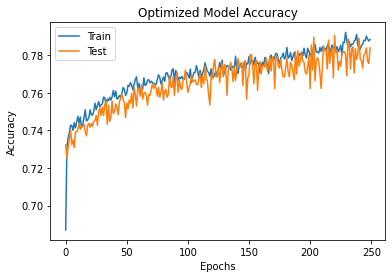

In [ ]:
plt.plot(history_optimized.history['accuracy'])
plt.plot(history_optimized.history['val_accuracy'])
plt.title('Optimized Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [ ]:
# Predict x_test
#
predictions_optimized= model_optimized.predict(x_test)
predictions_optimized

array([[0.7743276 ],
       [0.00280821],
       [0.03561146],
       ...,
       [0.47333154],
       [0.5930018 ],
       [0.8157091 ]], dtype=float32)

In [ ]:
y_pred_optimized = (predictions_optimized > 0.5)

y_pred_optimized

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
print('Accuracy of MLP Classifier: ', accuracy_score(y_test, y_pred_optimized))
print('Precision of MLP Classifier: ', precision_score(y_test, y_pred_optimized, average = 'binary'))
print('Recall of MLP Classifier: ', recall_score(y_test, y_pred_optimized, average = 'binary'))
print('F1 Score of MLP Classifier: ', f1_score(y_test, y_pred_optimized, average = 'binary'))

Accuracy of MLP Classifier:  0.7838394235717961
Precision of MLP Classifier:  0.7443336355394379
Recall of MLP Classifier:  0.8561001042752867
F1 Score of MLP Classifier:  0.7963142580019399


In [ ]:
confusion_matrix(y_test, y_pred_optimized)

array([[702, 282],
       [138, 821]])

In [ ]:
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       984
           1       0.74      0.86      0.80       959

    accuracy                           0.78      1943
   macro avg       0.79      0.78      0.78      1943
weighted avg       0.79      0.78      0.78      1943



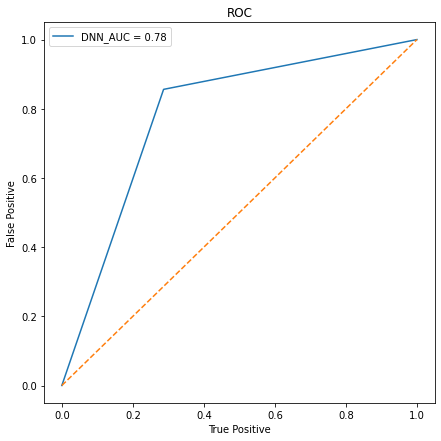

In [ ]:
# Plot ROC-AUC Diagram
import sklearn.metrics as metrics
FP, TP, threshold = metrics.roc_curve(y_test, y_pred_optimized)
roc_auc = metrics.auc(FP, TP)

import matplotlib.pyplot as plt
plt.subplots(1, figsize = (7,7))
plt.title('ROC')
plt.plot(FP, TP, label = 'DNN_AUC = %0.2f' % roc_auc)
plt.plot([0,1], ls = '--')
plt.xlabel('True Positive')
plt.ylabel('False Positive')
plt.legend()